In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sympy import symbols, Eq, solve
from datetime import datetime
from dateutil.relativedelta import relativedelta

import math


# Creating Dataframe

We are just builidng our original dataframe here with date, price, interest, and price changes

In [2]:
excel_file_path = 'chapt26.xlsx'
interest = pd.read_excel(excel_file_path, sheet_name='Data', usecols='A,H')
interest = interest.iloc[7:]
interest.columns = ['Year', 'Interest']
interest = interest.reset_index(drop=True)

In [3]:
excel_file_path = 'monthly_data.xls'
df = pd.read_excel(excel_file_path, sheet_name='Data', usecols='A,J')
df = df.iloc[7:]
df = df.reset_index(drop=True)
df.columns = ['Date', 'Price']

def correct_date_string_specific(date_str):
    parts = str(date_str).split('.')
    if len(parts) == 2 and parts[1] == '1':
        parts[1] = '10'
    return '.'.join(parts)

df['Date'] = df['Date'].apply(correct_date_string_specific)
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m')
df['Year'] = df['Date'].dt.year

In [4]:
df = pd.merge(interest, df, on = "Year")
df["Interest"] = (df["Interest"] - 1)/12
df = df[["Date", "Price", "Interest"]]

def add_percent_change (df):
    df = df.copy()
    diff = df['Price'].pct_change(fill_method=None)
    df["Percent Change"] = diff
    return df

df = add_percent_change(df)
df.head()

,Date,Price,Interest,Percent Change
0,1871-01-01,109.050018,0.003959,NaN
1,1871-02-01,107.765291,0.003959,-0.011781
2,1871-03-01,109.298845,0.003959,0.01423
3,1871-04-01,117.171191,0.003959,0.072026
4,1871-05-01,123.479273,0.003959,0.053836


# DataFrame Functions

In [5]:
from dataframe_utils import filter_dataframe_by_date, compare_growth_of_diff_leverages, calculate_diff_leverages_growth

# Math Functions

In [6]:

def market_drop(leveraged_x, new_leveraged_x):
    amount = 10000.
    leveraged_amount = amount * leveraged_x

    x = symbols('x')
    equation = Eq((leveraged_amount - x) / (amount - x), new_leveraged_x)
    total_amount_drop = solve(equation, x)[0]
    return total_amount_drop / amount

In [7]:
price_diff = filter_dataframe_by_date(df, datetime(1871, 2, 1), datetime(1901, 2, 1))
price_diff = compare_growth_of_diff_leverages(price_diff, 10000.)
price_diff.tail()

,Date,Price,Interest,Percent Change,Total Normal Amount,Total 3x Leveraged Amount,Total 2.5x Leveraged Amount,Total 2x Leveraged Amount
356,1900-10-01,1108.106193,0.00602,0.053145,5.038833e+06,2.571970e+06,3.193062e+06,3.862669e+06
357,1900-11-01,1199.257608,0.00602,0.082259,5.453282e+06,3.172989e+06,3.817890e+06,4.472168e+06
358,1900-12-01,1292.011908,0.00602,0.077343,5.874602e+06,3.866495e+06,4.517089e+06,5.133085e+06
359,1901-01-01,1317.880649,0.001489,0.020022,5.991349e+06,4.080628e+06,4.726812e+06,5.325726e+06
360,1901-02-01,1373.095838,0.001489,0.041897,6.241377e+06,4.574132e+06,5.204536e+06,5.758408e+06


In [8]:
# normal_list, leverage3x_list, leverage25x_list, leverage2x_list  = calculate_diff_leverages_growth(df, 6, 10000)

2024-01-01 00:00:00


In [9]:
# s_normal = pd.Series(normal_list)
# s_leverage3x = pd.Series(leverage3x_list)
# s_leverage25x = pd.Series(leverage25x_list)
# s_leverage2x = pd.Series(leverage2x_list)
# print(s_normal.describe())
# print(s_leverage3x.describe())

count    2.360000e+02
mean     6.742580e+06
std      2.634861e+06
min      2.286937e+06
25%      4.807798e+06
50%      6.259031e+06
75%      7.989672e+06
max      1.409313e+07
dtype: float64
count    2.360000e+02
mean     4.119723e+07
std      7.943039e+07
min      6.837242e+04
25%      3.034457e+06
50%      8.335526e+06
75%      3.078449e+07
max      4.405188e+08
dtype: float64


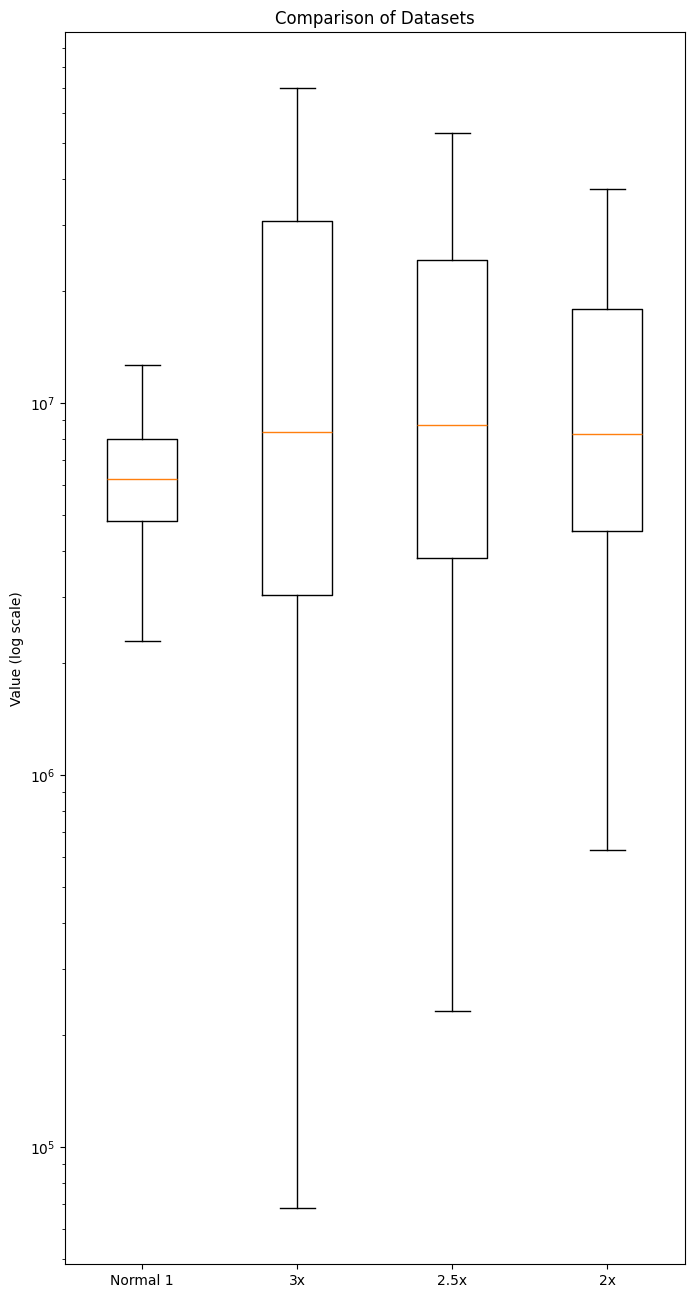

In [10]:
# # Plotting side-by-side boxplots
# plt.figure(figsize=(8, 16))
# plt.boxplot([s_normal, s_leverage3x, s_leverage25x, s_leverage2x], positions=[1, 2, 3, 4], showfliers=False)
# plt.yscale('log')  # Using a logarithmic scale
# plt.xticks([1, 2, 3, 4], ['Normal 1', '3x', '2.5x', '2x'])
# plt.title('Comparison of Datasets')
# plt.ylabel('Value (log scale)')
# plt.show()